<a href="https://colab.research.google.com/github/Nunzio03/follow-me-drone-notebooks/blob/master/tuningDataPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
!git clone https://github.com/Nunzio03/follow-me-drone-notebooks
!pwd



Cloning into 'follow-me-drone-notebooks'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 124 (delta 6), reused 0 (delta 0), pack-reused 108
Receiving objects: 100% (124/124), 26.70 MiB | 34.01 MiB/s, done.
Resolving deltas: 100% (18/18), done.
/content


In [24]:
os.chdir("/content/follow-me-drone-notebooks/tuning_pid/x_axis")
param_fitness = pd.read_csv("plot.csv", sep=',', header = None, names = ["P", "I","D","fitness"]).astype(float)
bestID= param_fitness["fitness"].idxmax()
bestRound = pd.read_csv("round"+str(bestID)+".csv", skiprows=2 , sep=';', header = None, names = ["time", "value"])


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

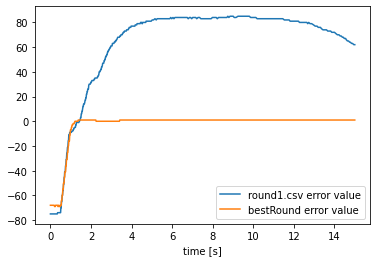

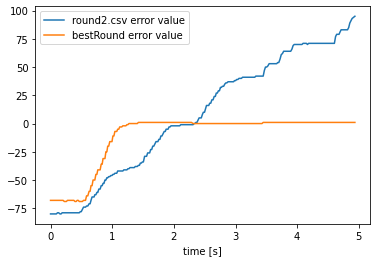

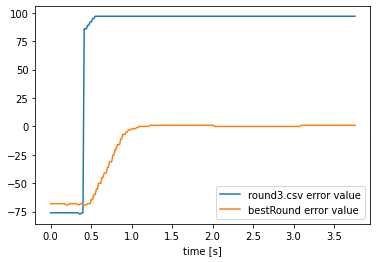

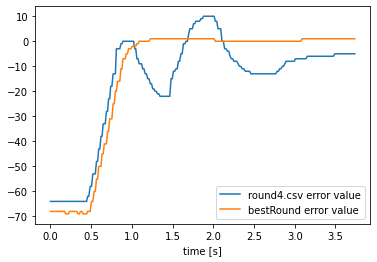

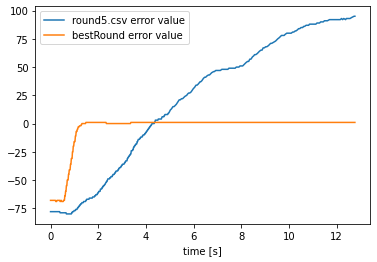

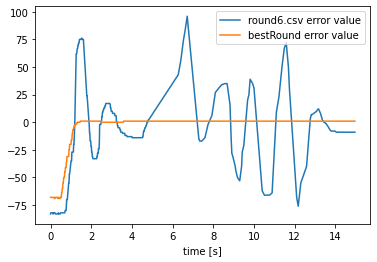

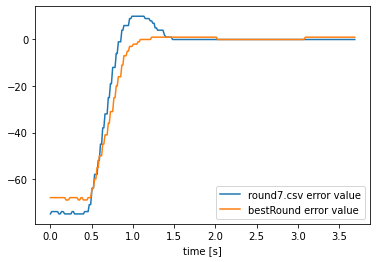

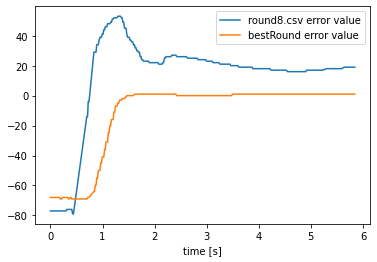

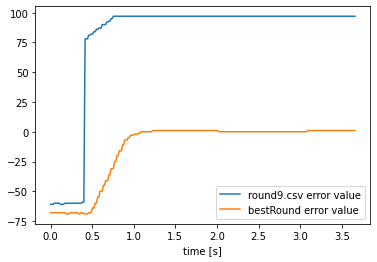

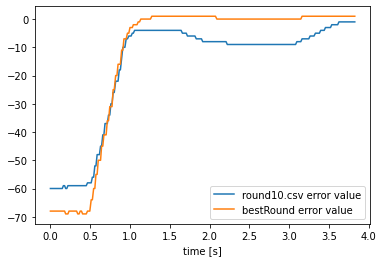

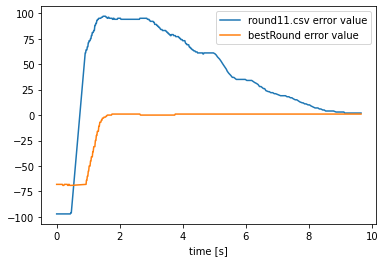

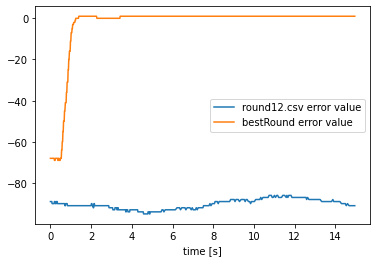

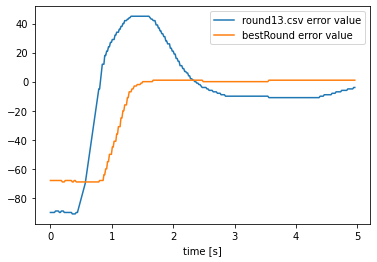

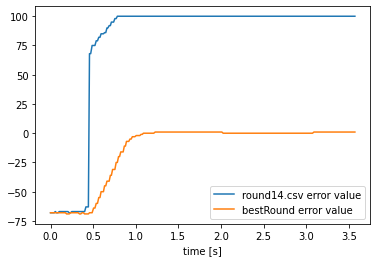

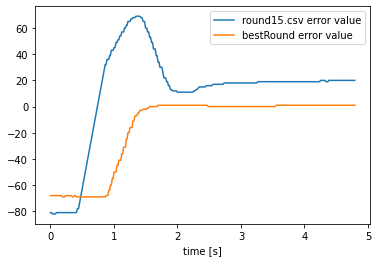

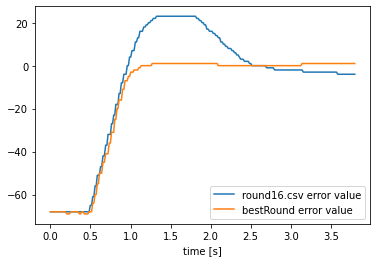

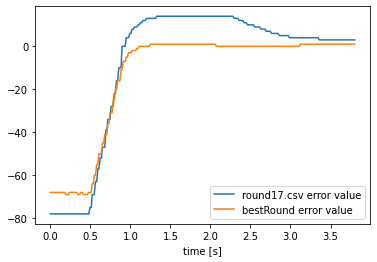

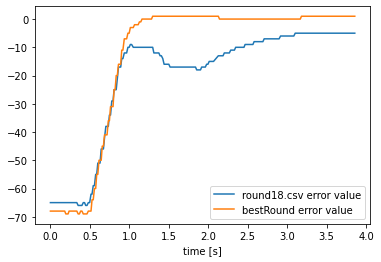

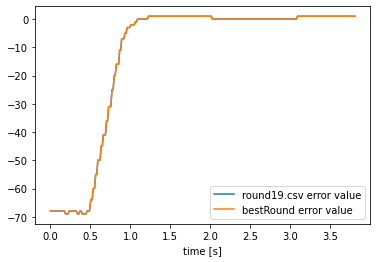

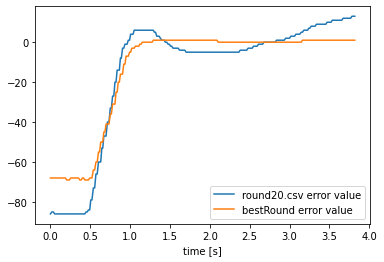

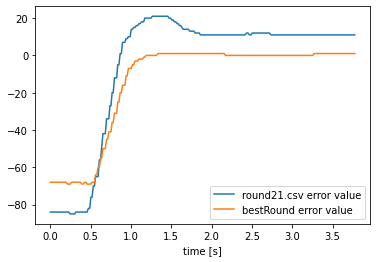

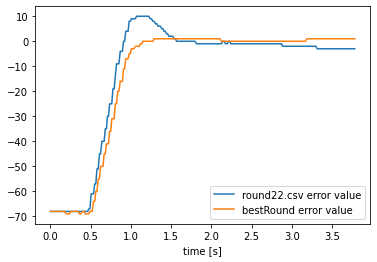

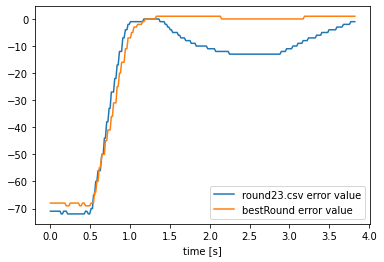

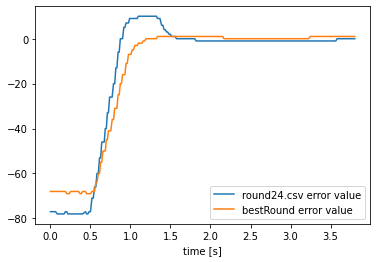

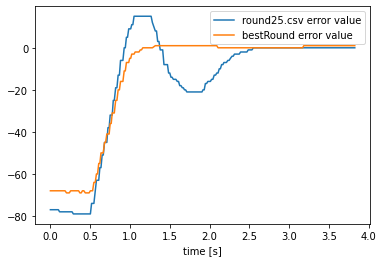

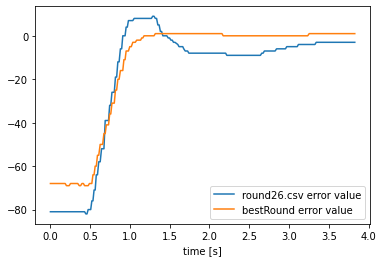

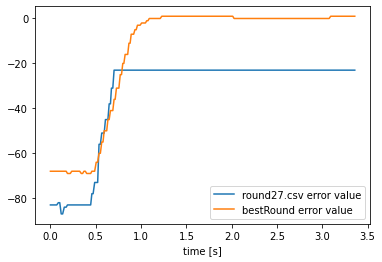

In [26]:

for i in range(1,28):
  currentplotname = "round"+str(i)+".csv"
  currentRound = pd.read_csv(currentplotname, skiprows=2 , sep=';', header = None, names = ["time", "value"])
  bestRound.drop(bestRound.tail(1).index,inplace=True)
  currentRound.drop(currentRound.tail(1).index,inplace=True)
  comparison = pd.DataFrame()
  
  if currentRound.size > bestRound.size:
    comparison['time'] = currentRound['time']
  else:
    comparison['time'] = bestRound['time']


  
  comparison[currentplotname+' error value'] = currentRound['value']
  comparison['bestRound error value'] = bestRound['value']
  comparison[currentplotname+' error value'].fillna(float(currentRound.tail(1)['value']), inplace = True)
  comparison['bestRound error value'].fillna(float(bestRound.tail(1)['value']), inplace = True)
  comparison['time [s]'] = comparison['time'].astype(float)
  comparison['time [s]']= comparison['time [s]']-comparison['time [s]'][0]
  
  plot = comparison.plot(x='time [s]')
  fig = plot.get_figure()
  fig.savefig("comparison"+str(i)+".png")

No handles with labels found to put in legend.


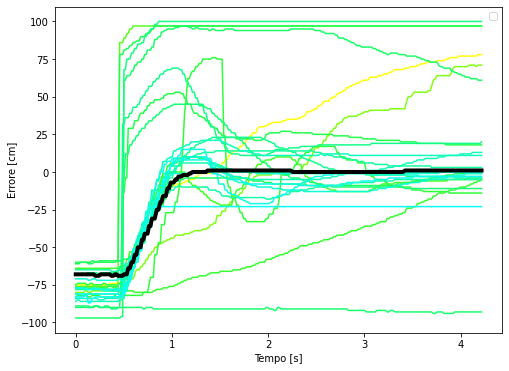

In [5]:
bestRound = pd.read_csv("round19.csv", skiprows=2 , sep=';', header = None, names = ["time", "value"])
bestRound.drop(bestRound.tail(1).index,inplace=True)
comparison = pd.DataFrame()
comparison['time'] = bestRound['time']
comparison['bestRound error value'] = bestRound['value']

for i in range(1,28):
  currentplotname = "round"+str(i)
  currentRound = pd.read_csv(currentplotname+".csv", skiprows=2 , sep=';', header = None, names = ["time", "value"])
  currentRound.drop(currentRound.tail(1).index,inplace=True)
  
  if currentRound.size > comparison.size:
    comparison['time'] = currentRound['time']

  comparison[currentplotname+' error value'] = currentRound['value']

for i in range(1,28):
  currentplotname = "round"+str(i)
  currentRound = pd.read_csv(currentplotname+".csv", skiprows=2 , sep=';', header = None, names = ["time", "value"])
  currentRound.drop(currentRound.tail(1).index,inplace=True)
  comparison[currentplotname+' error value'].fillna(float(currentRound.tail(1)['value']), inplace = True)


comparison['bestRound error value'].fillna(float(bestRound.tail(1)['value']), inplace = True)

comparison['time'] = comparison['time'].astype(float)
comparison['time']= comparison['time']-comparison['time'][0]

fig, ax = plt.subplots(figsize=(8, 6))
a = 1/(28)

for i in range(1,28):
  currentplotname = "round"+str(i)
  if i != bestID:
    plt.plot(comparison['time'], comparison[currentplotname+' error value'], color=(1/i,1,i/28), alpha=1)
 
plt.plot(comparison['time'], comparison["round"+str(bestID)+' error value'], color=(0,0,0,1), linewidth=4)

plt.legend(loc='best')
plt.xlabel('Tempo [s]')
plt.ylabel('Errore [cm]')
plt.savefig("total.png")


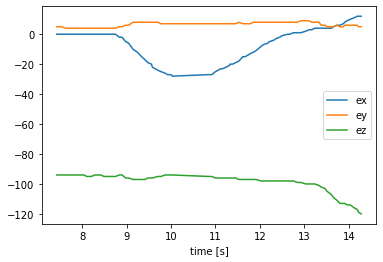

In [29]:
os.chdir("/content/follow-me-drone-notebooks/tuning_pid")
param_fitness = pd.read_csv("results 22_184.csv", sep=',', header = None, names = ["time [s]", "ex","ey","ez"]).astype(float)

param_fitness

plot = param_fitness.plot(x="time [s]")
